In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [9]:
#reading my data then using numpy log method to log transform
M = r"c:\Users\Ahmed\Desktop\Project Mats\Metrics.csv"
df = pd.read_csv(M)

In [10]:
#This is Metrics/CLV data which is aggregated on custmerID
df

,CustomerID,TotalSales,Frequency,AverageOrderValue,LifeSpan,CLV
0,12346,0.00,2,0.000000,1,0.00
1,12347,1191.68,4,297.920000,50,59584.00
2,12348,1723.92,3,574.640000,1,1723.92
3,12356,2585.12,4,646.280000,1,2585.12
4,12370,4965.45,12,413.787500,47,233376.15
...,...,...,...,...,...,...
1207,18256,12.26,1,12.260000,15,183.90
1208,18259,356.80,2,178.400000,1,356.80
1209,18260,366.87,5,73.374000,31,11372.97
1210,18269,9.30,1,9.300000,1,9.30


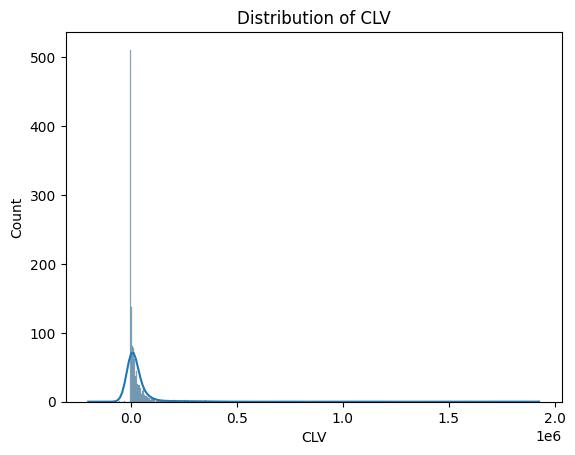

In [11]:
#the histogram before log transformation,right skewed distribution
#which means our CLV standard diviation is big which makes our pridictions not as performant
sns.histplot(df['CLV'],kde=True)
plt.title('Distribution of CLV')
plt.show()

In [12]:
#creating a new column for log transformation for better distribution 
df['Log_CLV'] = np.log1p(df['CLV'])

#data after creating Log_CLV Column
df

C:\Users\Ahmed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CustomerID,TotalSales,Frequency,AverageOrderValue,LifeSpan,CLV,Log_CLV
0,12346,0.00,2,0.000000,1,0.00,0.000000
1,12347,1191.68,4,297.920000,50,59584.00,10.995159
2,12348,1723.92,3,574.640000,1,1723.92,7.452936
3,12356,2585.12,4,646.280000,1,2585.12,7.857914
4,12370,4965.45,12,413.787500,47,233376.15,12.360411
...,...,...,...,...,...,...,...
1207,18256,12.26,1,12.260000,15,183.90,5.219815
1208,18259,356.80,2,178.400000,1,356.80,5.879974
1209,18260,366.87,5,73.374000,31,11372.97,9.339083
1210,18269,9.30,1,9.300000,1,9.30,2.332144


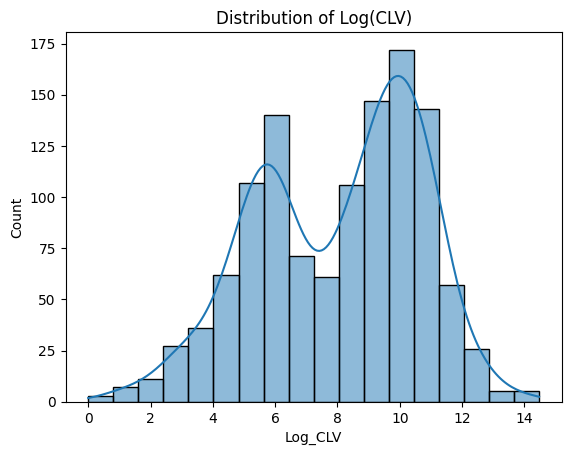

In [13]:
#creating another histogram after log transoformation,bimodal distribution
#the diviation here is lower and more close which makes it good for future predictive analytics (regression)
sns.histplot(df['Log_CLV'], kde=True)
plt.title('Distribution of Log(CLV)')
plt.show()

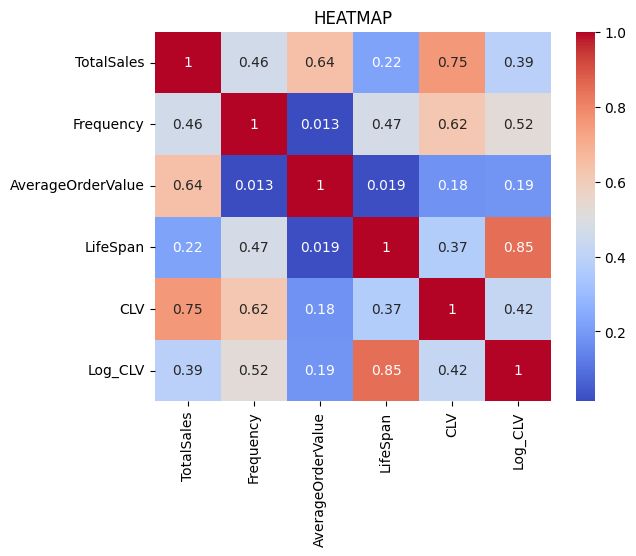

In [14]:
#creating new df without CustomerID column as it is not related to our correlation heatmap
cleaneddf = df.drop(columns=['CustomerID'])
#heatmap to find correlations (gives useful insights for pridictions)
sns.heatmap(cleaneddf.corr(), annot=True, cmap="coolwarm")
plt.title('HEATMAP')
plt.show()